# CUSTOMER SEGMENTATION ANALYSIS

In [17]:
# Importing the libraries
import pandas as pd
import numpy as np
import seaborn as sns

In [18]:
df = pd.read_csv("Mall_Customers.csv")

In [19]:
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [20]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [21]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


<IPython.core.display.Javascript object>

Text(0.5, 1.0, 'Distribution of Gender')

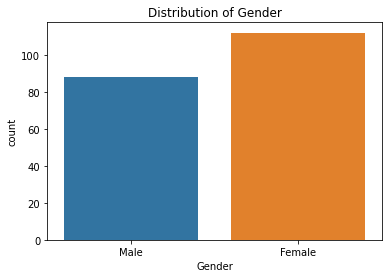

In [22]:
# Exploring The Data
# See the distribution of gender to recognize different distributions
sns.countplot(x='Gender', data=df)
plt.title('Distribution of Gender')

#There are slightly more women than men in this data set. They will perhaps be a significant element in your customer 
# segmentation efforts later.

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Text(0.5, 0, 'Age')

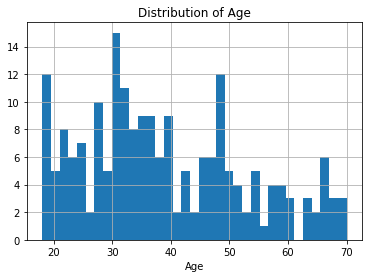

In [23]:
# Create a histogram of ages
df.hist('Age', bins=35)
plt.title('Distribution of Age')
plt.xlabel('Age')

# The ages are mostly between 30-40. From the describe() method we already noticed that the avg age was 38.
# There are less older customers in the dataset hence the distribution is right skewed one because of their longer right tail.

In [24]:
# Let us create one histogram for each gender.

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

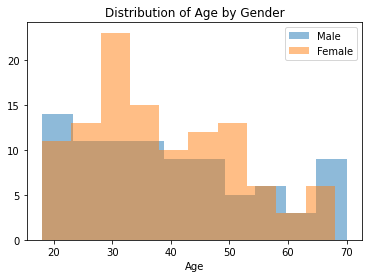

In [25]:
plt.hist('Age', data=df[df['Gender'] == 'Male'], alpha=0.5, label='Male');
plt.hist('Age', data=df[df['Gender'] == 'Female'], alpha=0.5, label='Female');
plt.title('Distribution of Age by Gender');
plt.xlabel('Age');
plt.legend();

# The men in this data set tended to be younger than the women. You can see the spike around the age of 30–35 for the 
# women is where the majority of them fall. 

In [26]:
# Let us analyse the income now.

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Text(0.5, 0, 'Thousands of Dollars')

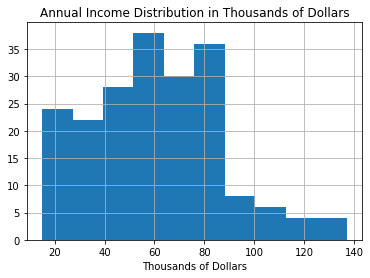

In [27]:
df.hist('Annual Income (k$)')
plt.title('Annual Income Distribution in Thousands of Dollars')
plt.xlabel('Thousands of Dollars')

# Much of the income lies between 60 to 85000 dollars. Let us check that whether gender has any impact on this.

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

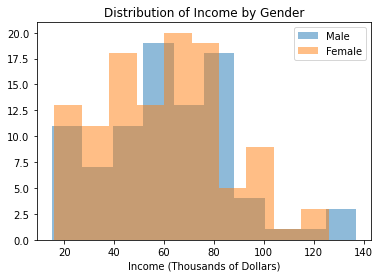

In [28]:
# Histogram of income by gender
plt.hist('Annual Income (k$)', data=df[df['Gender'] == 'Male'], alpha=0.5, label='Male')
plt.hist('Annual Income (k$)', data=df[df['Gender'] == 'Female'], alpha=0.5, label='Female')
plt.title('Distribution of Income by Gender')
plt.xlabel('Income (Thousands of Dollars)')
plt.legend()

# The women in the dataset make less money than men. 

In [29]:
# Create data sets by gender to save time in the future since gender seems to significantly impact other variables
male = df[df['Gender'] == 'Male']
female = df[df['Gender'] == 'Female']

# Print the average spending score for men and women
print(male['Spending Score (1-100)'].mean())
print(female['Spending Score (1-100)'].mean())

48.51136363636363
51.526785714285715


In [30]:
# Eventhough the income of females are less than males, the avg spending score of female customers(51.52dollar) are more than
# that of male customers. 

C:\Users\Laxmi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<IPython.core.display.Javascript object>

Text(0.5, 1.0, 'Age to Income, Colored by Gender')

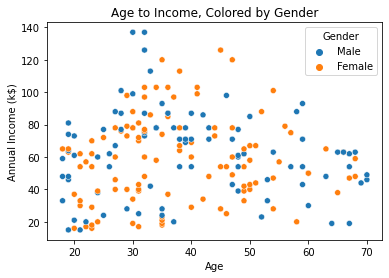

In [31]:
# Let us plot some scatter plots inorder to understand the age to income relation with hue as gender.

sns.scatterplot('Age', 'Annual Income (k$)', hue='Gender', data=df)
plt.title('Age to Income, Colored by Gender')

# There is no clear correlation between age and income.

<AxesSubplot:>

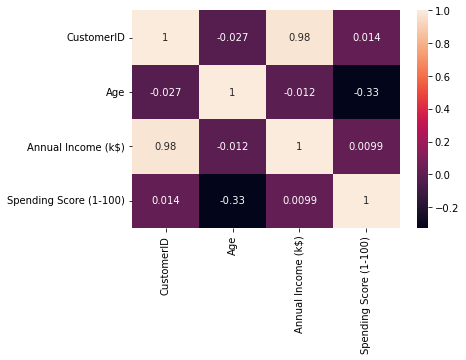

In [33]:
# Let us look into heatmap.
sns.heatmap(df.corr(), annot=True)

# Age and spending score have a negative correlation value, which indicates that older customers have less spending score
# compared to younger customers.But the value is just 0.33 which implies that it is a weak correlation.

C:\Users\Laxmi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<IPython.core.display.Javascript object>

Text(0.5, 1.0, 'Age to Spending score, Colored by Gender')

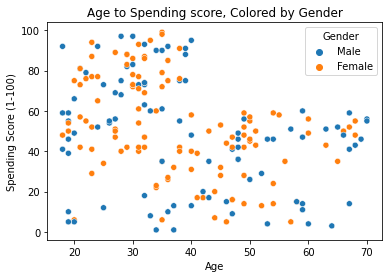

In [34]:
# Let us plot scatter plot to find the relation between age and spending score.

sns.scatterplot('Age', 'Spending Score (1-100)', hue='Gender', data=df)
plt.title('Age to Spending score, Colored by Gender')

# There is a slight negative relation here.

<IPython.core.display.Javascript object>

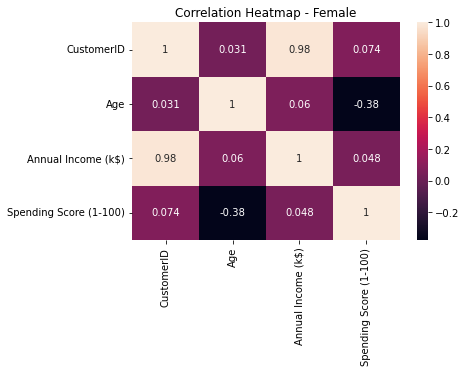

In [35]:
# Lets check the correlation values for both female and male customers.
# 1. Female customers
sns.heatmap(female.corr(), annot=True);
plt.title('Correlation Heatmap - Female');

<IPython.core.display.Javascript object>

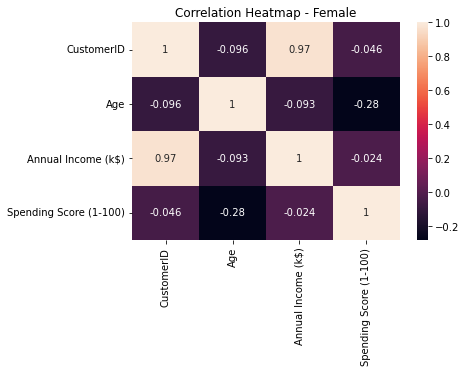

In [37]:
# 2.Male customers
sns.heatmap(male.corr(), annot=True);
plt.title('Correlation Heatmap - Female');

In [ ]:
## INSIGHTS

# Age more strongly affects spending score for women in this case. Nothing else is really strongly correlated enough
# to say much of anything.

C:\Users\Laxmi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<IPython.core.display.Javascript object>

Text(0.5, 1.0, 'Age to Spending Score, Female Only')

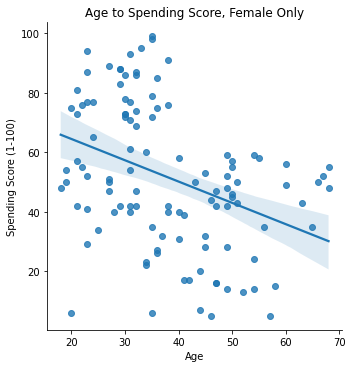

In [38]:
# let us plot an lmplot to find the relation between female customer's spending relation with age.

sns.lmplot('Age', 'Spending Score (1-100)', data=female)
plt.title('Age to Spending Score, Female Only')

C:\Users\Laxmi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<IPython.core.display.Javascript object>

Text(0.5, 1.0, 'Annual Income to Spending Score, Colored by Gender')

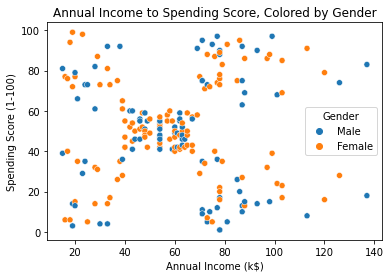

In [39]:
# Lastly, we can look at income to spending score colored by gender .

sns.scatterplot('Annual Income (k$)', 'Spending Score (1-100)', hue='Gender', data=df)
plt.title('Annual Income to Spending Score, Colored by Gender')

